In [1]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
from missingpy import MissForest
import matplotlib.pylab as plt
import seaborn as sns

C:\Users\Josh\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# a dictionary to put all of the accuracies
accuracies = {}

In [3]:
# loading data with 10% missing
gse111631_10 = pd.read_csv('data\out\gse111631_10.csv').rename(columns={'Unnamed: 0':'Sample'}).set_index('Sample')
print(gse111631_10.isna().sum().sum()/(gse111631_10.shape[0]*gse111631_10.shape[1])*100, '% missing values')
print(gse111631_10.shape)
gse111631_10.head()

10.079710144927537 % missing values
(138, 100)


,cg26312252,cg16010788,cg27327268,cg14188232,cg26180255,cg04493788,cg22832061,cg07153419,cg05580991,cg04758270,...,cg16365799,cg10169393,cg01701742,cg26502215,cg02062799,cg26146988,cg27649089,cg07507559,cg25598685,cg24181266
Sample,,,,,,,,,,,,,,,,,,,,,
201172560029_R01C01,0.946,0.888,0.952,0.066,NaN,0.072,0.018,0.694,0.761,0.899,...,0.019,0.241,0.953,0.919,0.930,0.919,0.018,NaN,0.881,0.040
201172560029_R03C01,0.950,0.870,0.966,0.054,0.893,0.069,0.021,0.793,0.789,0.889,...,0.019,0.184,0.959,0.930,0.936,NaN,0.022,0.930,0.893,0.297
201172560029_R04C01,0.953,0.867,0.963,0.126,0.920,0.047,0.018,NaN,0.782,0.917,...,0.017,0.287,0.961,NaN,0.953,0.925,NaN,0.927,0.847,0.066
201172560029_R05C01,NaN,0.861,0.969,0.049,0.927,0.059,NaN,0.824,0.877,0.953,...,0.022,0.334,0.967,0.904,0.948,0.945,0.019,0.921,NaN,0.029
201172560029_R06C01,0.949,0.846,0.966,NaN,0.941,0.066,0.016,0.845,0.846,0.938,...,0.028,0.406,0.955,NaN,0.949,0.941,0.019,0.942,0.895,NaN


In [4]:
# loading original
original_gse111631 = pd.read_csv('data\out\gse111631_original.csv').rename(columns={'Unnamed: 0':'Sample'}).set_index('Sample')
print(original_gse111631.shape)
original_gse111631.head()

(138, 100)


,cg26312252,cg16010788,cg27327268,cg14188232,cg26180255,cg04493788,cg22832061,cg07153419,cg05580991,cg04758270,...,cg16365799,cg10169393,cg01701742,cg26502215,cg02062799,cg26146988,cg27649089,cg07507559,cg25598685,cg24181266
Sample,,,,,,,,,,,,,,,,,,,,,
201172560029_R01C01,0.946,0.888,0.952,0.066,0.912,0.072,0.018,0.694,0.761,0.899,...,0.019,0.241,0.953,0.919,0.930,0.919,0.018,0.871,0.881,0.040
201172560029_R03C01,0.950,0.870,0.966,0.054,0.893,0.069,0.021,0.793,0.789,0.889,...,0.019,0.184,0.959,0.930,0.936,0.909,0.022,0.930,0.893,0.297
201172560029_R04C01,0.953,0.867,0.963,0.126,0.920,0.047,0.018,0.871,0.782,0.917,...,0.017,0.287,0.961,0.880,0.953,0.925,0.019,0.927,0.847,0.066
201172560029_R05C01,0.943,0.861,0.969,0.049,0.927,0.059,0.014,0.824,0.877,0.953,...,0.022,0.334,0.967,0.904,0.948,0.945,0.019,0.921,0.791,0.029
201172560029_R06C01,0.949,0.846,0.966,0.067,0.941,0.066,0.016,0.845,0.846,0.938,...,0.028,0.406,0.955,0.866,0.949,0.941,0.019,0.942,0.895,0.102


In [5]:
def get_accuracies(imputed, missing=gse111631_10, original=original_gse111631):
    # sum of squared errors, mean of average absolute errors, root mean squared error
    ret = {}
    ret['sse'] = ((imputed.mask(~missing.isna()) - original.mask(~missing.isna()))**2).sum().sum()
    ret['mae'] = (imputed.mask(~missing.isna()) - original.mask(~missing.isna())).abs().sum().mean()
    ret['rmse'] = (((imputed.mask(~missing.isna()) - original.mask(~missing.isna()))**2).sum().mean())**(1/2)
    return ret

## kNN imputation

In [6]:
def knns(original: pd.DataFrame, missing: pd.DataFrame, n_neighbors: list=[1,2,3,4,5]):
    accuracies = {}
    for k in n_neighbors:
        print(f'starting {k} neighbor')
        imputer = KNNImputer(n_neighbors=k)
        imputed = pd.DataFrame(imputer.fit_transform(missing), columns=original.columns, index=original.index)
        
        accuracies[k] = get_accuracies(imputed)
    return accuracies

In [7]:
knn_accs = knns(original_gse111631, gse111631_10, n_neighbors=[1,2,3,4,5,6,7,8,9,10])
knn_accs

starting 1 neighbor
starting 2 neighbor
starting 3 neighbor
starting 4 neighbor
starting 5 neighbor
starting 6 neighbor
starting 7 neighbor
starting 8 neighbor
starting 9 neighbor
starting 10 neighbor


{1: {'sse': 3.4864170000000003, 'mae': 0.38513, 'rmse': 0.1867194955006038},
 2: {'sse': 3.01771025,
  'mae': 0.3485949999999999,
  'rmse': 0.17371557932436574},
 3: {'sse': 2.911268888888889,
  'mae': 0.33345333333333327,
  'rmse': 0.17062440883088473},
 4: {'sse': 2.8739658124999994,
  'mae': 0.32832249999999985,
  'rmse': 0.16952775030949946},
 5: {'sse': 2.8623934399999995, 'mae': 0.328464, 'rmse': 0.16918609399120246},
 6: {'sse': 2.8084474999999998,
  'mae': 0.3238399999999999,
  'rmse': 0.16758423255187224},
 7: {'sse': 2.8111109591836736,
  'mae': 0.31984714285714283,
  'rmse': 0.16766368000207063},
 8: {'sse': 2.7607659375, 'mae': 0.31762, 'rmse': 0.16615552766910885},
 9: {'sse': 2.8217334197530866,
  'mae': 0.3190055555555555,
  'rmse': 0.16798016013068587},
 10: {'sse': 2.7978159399999996, 'mae': 0.317468, 'rmse': 0.1672667313006385}}

In [8]:
accuracies['knn_6_neighbors'] = knn_accs[6]

## HOLOclean

In [9]:
holoclean_betas = pd.read_csv('data\out\holoclean_output_10.csv').rename(columns={'Unnamed: 0':'Sample'}).set_index('Sample').drop(columns=['_tid_'])
holoclean_betas.index = holoclean_betas.index.str.upper()
print(holoclean_betas.shape)
holoclean_betas.head()

(138, 100)


,cg26312252,cg16010788,cg27327268,cg14188232,cg26180255,cg04493788,cg22832061,cg07153419,cg05580991,cg04758270,...,cg16365799,cg10169393,cg01701742,cg26502215,cg02062799,cg26146988,cg27649089,cg07507559,cg25598685,cg24181266
Sample,,,,,,,,,,,,,,,,,,,,,
201172560029_R01C01,0.946,0.888,0.952,0.066,0.923,0.072,0.018,0.694,0.761,0.899,...,0.019,0.241,0.953,0.919,0.930,0.919,0.018,0.906,0.881,0.040
201172560029_R03C01,0.950,0.870,0.966,0.054,0.893,0.069,0.021,0.793,0.789,0.889,...,0.019,0.184,0.959,0.930,0.936,0.930,0.022,0.930,0.893,0.297
201172560029_R04C01,0.953,0.867,0.963,0.126,0.920,0.047,0.018,0.777,0.782,0.917,...,0.017,0.287,0.961,0.918,0.953,0.925,0.019,0.927,0.847,0.066
201172560029_R05C01,0.941,0.861,0.969,0.049,0.927,0.059,0.017,0.824,0.877,0.953,...,0.022,0.334,0.967,0.904,0.948,0.945,0.019,0.921,0.859,0.029
201172560029_R06C01,0.949,0.846,0.966,0.052,0.941,0.066,0.016,0.845,0.846,0.938,...,0.028,0.406,0.955,0.930,0.949,0.941,0.019,0.942,0.895,0.034


In [10]:
holoclean_accuracies = get_accuracies(holoclean_betas, gse111631_10, original_gse111631)
holoclean_accuracies

{'sse': 5.349302999999999,
 'mae': 0.43760999999999994,
 'rmse': 0.2312856026647573}

In [11]:
accuracies['holoclean_aimnet'] = holoclean_accuracies

## Mean Imputation

In [12]:
mean_imputed = gse111631_10.replace(to_replace=np.nan, value=gse111631_10.mean())
print(mean_imputed.shape)
mean_imputed.head()

(138, 100)


,cg26312252,cg16010788,cg27327268,cg14188232,cg26180255,cg04493788,cg22832061,cg07153419,cg05580991,cg04758270,...,cg16365799,cg10169393,cg01701742,cg26502215,cg02062799,cg26146988,cg27649089,cg07507559,cg25598685,cg24181266
Sample,,,,,,,,,,,,,,,,,,,,,
201172560029_R01C01,0.946000,0.888,0.952,0.066000,0.927692,0.072,0.018000,0.69400,0.761,0.899,...,0.019,0.241,0.953,0.919000,0.930,0.919000,0.018000,0.894024,0.881000,0.040000
201172560029_R03C01,0.950000,0.870,0.966,0.054000,0.893000,0.069,0.021000,0.79300,0.789,0.889,...,0.019,0.184,0.959,0.930000,0.936,0.920848,0.022000,0.930000,0.893000,0.297000
201172560029_R04C01,0.953000,0.867,0.963,0.126000,0.920000,0.047,0.018000,0.79519,0.782,0.917,...,0.017,0.287,0.961,0.891024,0.953,0.925000,0.019895,0.927000,0.847000,0.066000
201172560029_R05C01,0.942935,0.861,0.969,0.049000,0.927000,0.059,0.017952,0.82400,0.877,0.953,...,0.022,0.334,0.967,0.904000,0.948,0.945000,0.019000,0.921000,0.831408,0.029000
201172560029_R06C01,0.949000,0.846,0.966,0.068333,0.941000,0.066,0.016000,0.84500,0.846,0.938,...,0.028,0.406,0.955,0.891024,0.949,0.941000,0.019000,0.942000,0.895000,0.104484


In [13]:
mean_accuracies = get_accuracies(mean_imputed, gse111631_10, original_gse111631)
mean_accuracies

{'sse': 3.5181820984992327,
 'mae': 0.37457894428693783,
 'rmse': 0.1875681768984076}

In [14]:
accuracies['mean_imputation'] = mean_accuracies

## Median Imputation

In [15]:
median_imputed = gse111631_10.replace(to_replace=np.nan, value=gse111631_10.median())
print(median_imputed.shape)
median_imputed.head()

(138, 100)


,cg26312252,cg16010788,cg27327268,cg14188232,cg26180255,cg04493788,cg22832061,cg07153419,cg05580991,cg04758270,...,cg16365799,cg10169393,cg01701742,cg26502215,cg02062799,cg26146988,cg27649089,cg07507559,cg25598685,cg24181266
Sample,,,,,,,,,,,,,,,,,,,,,
201172560029_R01C01,0.946,0.888,0.952,0.066,0.9315,0.072,0.018,0.694,0.761,0.899,...,0.019,0.241,0.953,0.9190,0.930,0.919,0.018,0.900,0.881,0.0400
201172560029_R03C01,0.950,0.870,0.966,0.054,0.8930,0.069,0.021,0.793,0.789,0.889,...,0.019,0.184,0.959,0.9300,0.936,0.928,0.022,0.930,0.893,0.2970
201172560029_R04C01,0.953,0.867,0.963,0.126,0.9200,0.047,0.018,0.795,0.782,0.917,...,0.017,0.287,0.961,0.9005,0.953,0.925,0.020,0.927,0.847,0.0660
201172560029_R05C01,0.944,0.861,0.969,0.049,0.9270,0.059,0.018,0.824,0.877,0.953,...,0.022,0.334,0.967,0.9040,0.948,0.945,0.019,0.921,0.860,0.0290
201172560029_R06C01,0.949,0.846,0.966,0.063,0.9410,0.066,0.016,0.845,0.846,0.938,...,0.028,0.406,0.955,0.9005,0.949,0.941,0.019,0.942,0.895,0.0815


In [16]:
median_accuracies = get_accuracies(median_imputed)
median_accuracies

{'sse': 3.5948480000000003,
 'mae': 0.36472999999999994,
 'rmse': 0.18960084387997855}

In [17]:
accuracies['median_imputation'] = median_accuracies

## Mode Imputation

In [18]:
mode_imputed = gse111631_10.replace(to_replace=np.nan, value=gse111631_10.mode().mean())
print(mode_imputed.shape)
mode_imputed.head()

(138, 100)


,cg26312252,cg16010788,cg27327268,cg14188232,cg26180255,cg04493788,cg22832061,cg07153419,cg05580991,cg04758270,...,cg16365799,cg10169393,cg01701742,cg26502215,cg02062799,cg26146988,cg27649089,cg07507559,cg25598685,cg24181266
Sample,,,,,,,,,,,,,,,,,,,,,
201172560029_R01C01,0.946,0.888,0.952,0.0660,0.938,0.072,0.018,0.694,0.761,0.899,...,0.019,0.241,0.953,0.919,0.930,0.919,0.018,0.897667,0.881000,0.040
201172560029_R03C01,0.950,0.870,0.966,0.0540,0.893,0.069,0.021,0.793,0.789,0.889,...,0.019,0.184,0.959,0.930,0.936,0.943,0.022,0.930000,0.893000,0.297
201172560029_R04C01,0.953,0.867,0.963,0.1260,0.920,0.047,0.018,0.796,0.782,0.917,...,0.017,0.287,0.961,0.901,0.953,0.925,0.020,0.927000,0.847000,0.066
201172560029_R05C01,0.944,0.861,0.969,0.0490,0.927,0.059,0.015,0.824,0.877,0.953,...,0.022,0.334,0.967,0.904,0.948,0.945,0.019,0.921000,0.871333,0.029
201172560029_R06C01,0.949,0.846,0.966,0.0615,0.941,0.066,0.016,0.845,0.846,0.938,...,0.028,0.406,0.955,0.901,0.949,0.941,0.019,0.942000,0.895000,0.026


In [19]:
mode_accuracies = get_accuracies(mode_imputed)
mode_accuracies

{'sse': 4.381633300082199,
 'mae': 0.3937626904761904,
 'rmse': 0.20932351277585132}

In [20]:
accuracies['mode_imputation'] = mode_accuracies

## missForest

In [21]:
clf = MissForest(max_iter=1000, random_state=100)
clf.fit(np.array(gse111631_10))
missForest_imputed = clf.transform(gse111631_10)
missForest_imputed = pd.DataFrame(missForest_imputed, columns=gse111631_10.columns, index=gse111631_10.index)
print(missForest_imputed.shape)
missForest_imputed.head()

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
(138, 100)


,cg26312252,cg16010788,cg27327268,cg14188232,cg26180255,cg04493788,cg22832061,cg07153419,cg05580991,cg04758270,...,cg16365799,cg10169393,cg01701742,cg26502215,cg02062799,cg26146988,cg27649089,cg07507559,cg25598685,cg24181266
Sample,,,,,,,,,,,,,,,,,,,,,
201172560029_R01C01,0.94600,0.888,0.952,0.06600,0.91027,0.072,0.01800,0.69400,0.761,0.899,...,0.019,0.241,0.953,0.91900,0.930,0.91900,0.01800,0.91128,0.88100,0.04000
201172560029_R03C01,0.95000,0.870,0.966,0.05400,0.89300,0.069,0.02100,0.79300,0.789,0.889,...,0.019,0.184,0.959,0.93000,0.936,0.91932,0.02200,0.93000,0.89300,0.29700
201172560029_R04C01,0.95300,0.867,0.963,0.12600,0.92000,0.047,0.01800,0.79763,0.782,0.917,...,0.017,0.287,0.961,0.91374,0.953,0.92500,0.01915,0.92700,0.84700,0.06600
201172560029_R05C01,0.94506,0.861,0.969,0.04900,0.92700,0.059,0.01695,0.82400,0.877,0.953,...,0.022,0.334,0.967,0.90400,0.948,0.94500,0.01900,0.92100,0.80516,0.02900
201172560029_R06C01,0.94900,0.846,0.966,0.05665,0.94100,0.066,0.01600,0.84500,0.846,0.938,...,0.028,0.406,0.955,0.89307,0.949,0.94100,0.01900,0.94200,0.89500,0.05675


In [22]:
miss_forest_accuracies = get_accuracies(missForest_imputed)
miss_forest_accuracies

{'sse': 2.925700970500001,
 'mae': 0.30914370000000013,
 'rmse': 0.17104680559718155}

In [23]:
accuracies['miss_forest'] = miss_forest_accuracies

## Iterative Imputer

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [25]:
clf = IterativeImputer(imputation_order='random', random_state=100, min_value=0, max_value=1, verbose=True)
clf.fit(np.array(gse111631_10))
iterative_imputed = clf.transform(gse111631_10)
iterative_imputed = pd.DataFrame(iterative_imputed, columns=gse111631_10.columns, index=gse111631_10.index)
print(iterative_imputed.shape)
iterative_imputed.head()

[IterativeImputer] Completing matrix with shape (138, 100)
[IterativeImputer] Change: 0.5233743346030344, scaled tolerance: 0.000992 
[IterativeImputer] Change: 0.120051494433315, scaled tolerance: 0.000992 
[IterativeImputer] Change: 0.02151968362446372, scaled tolerance: 0.000992 
[IterativeImputer] Change: 0.004998661973613809, scaled tolerance: 0.000992 
[IterativeImputer] Change: 0.0010854242240254316, scaled tolerance: 0.000992 
[IterativeImputer] Change: 0.0004662071701665646, scaled tolerance: 0.000992 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (138, 100)
(138, 100)


,cg26312252,cg16010788,cg27327268,cg14188232,cg26180255,cg04493788,cg22832061,cg07153419,cg05580991,cg04758270,...,cg16365799,cg10169393,cg01701742,cg26502215,cg02062799,cg26146988,cg27649089,cg07507559,cg25598685,cg24181266
Sample,,,,,,,,,,,,,,,,,,,,,
201172560029_R01C01,0.946000,0.888,0.952,0.066000,0.908666,0.072,0.018000,0.694000,0.761,0.899,...,0.019,0.241,0.953,0.919000,0.930,0.919000,0.018000,0.895944,0.881000,0.040000
201172560029_R03C01,0.950000,0.870,0.966,0.054000,0.893000,0.069,0.021000,0.793000,0.789,0.889,...,0.019,0.184,0.959,0.930000,0.936,0.925733,0.022000,0.930000,0.893000,0.297000
201172560029_R04C01,0.953000,0.867,0.963,0.126000,0.920000,0.047,0.018000,0.776536,0.782,0.917,...,0.017,0.287,0.961,0.901510,0.953,0.925000,0.018637,0.927000,0.847000,0.066000
201172560029_R05C01,0.942786,0.861,0.969,0.049000,0.927000,0.059,0.018107,0.824000,0.877,0.953,...,0.022,0.334,0.967,0.904000,0.948,0.945000,0.019000,0.921000,0.886698,0.029000
201172560029_R06C01,0.949000,0.846,0.966,0.068306,0.941000,0.066,0.016000,0.845000,0.846,0.938,...,0.028,0.406,0.955,0.912368,0.949,0.941000,0.019000,0.942000,0.895000,0.058453


In [26]:
iterative_accuracies = get_accuracies(iterative_imputed)
iterative_accuracies

{'sse': 2.710036685710601,
 'mae': 0.30987555639387276,
 'rmse': 0.16462189057687926}

In [27]:
accuracies['iterative'] = iterative_accuracies

## Autoencoder Tensorflow

Adapted from this tutorial: https://curiousily.com/posts/data-imputation-using-autoencoders/

In [28]:
import pandas as pd
import numpy as np
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.objectives import mse
from keras.models import Sequential
from keras.layers.core import Dropout, Dense
from keras.regularizers import l1_l2
from collections import defaultdict


In [29]:
def make_reconstruction_loss(n_features):
    def reconstruction_loss(input_and_mask, y_pred):
        X_values = input_and_mask[:, :n_features]
        missing_mask = input_and_mask[:, n_features:]
        observed_mask = 1 - missing_mask
        X_values_observed = X_values * observed_mask
        pred_observed = y_pred * observed_mask
        return mse(y_true=X_values_observed, y_pred=pred_observed)
    return reconstruction_loss


In [30]:
def masked_mae(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    return np.mean(np.abs(masked_diff))

In [31]:
class Autoencoder:
    def __init__(self, data,
                 recurrent_weight=0.5,
                 optimizer="adam",
                 dropout_probability=0.5,
                 hidden_activation="relu",
                 output_activation="sigmoid",
                 init="glorot_normal",
                 l1_penalty=0,
                 l2_penalty=0):
        self.data = data.copy()
        self.recurrent_weight = recurrent_weight
        self.optimizer = optimizer
        self.dropout_probability = dropout_probability
        self.hidden_activation = hidden_activation
        self.output_activation = output_activation
        self.init = init
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty
    def _get_hidden_layer_sizes(self):
        n_dims = self.data.shape[1]
        return [
            min(2000, 8 * n_dims),
            min(500, 2 * n_dims),
            int(np.ceil(0.5 * n_dims)),
        ]
    def _create_model(self):
        hidden_layer_sizes = self._get_hidden_layer_sizes()
        first_layer_size = hidden_layer_sizes[0]
        n_dims = self.data.shape[1]
        model = Sequential()
        model.add(Dense(
            first_layer_size,
            input_dim= 2 * n_dims,
            activation=self.hidden_activation,
            activity_regularizer=l1_l2(self.l1_penalty, self.l2_penalty)))
        model.add(Dropout(self.dropout_probability))
        for layer_size in hidden_layer_sizes[1:]:
            model.add(Dense(
                layer_size,
                activation=self.hidden_activation,
                activity_regularizer=l1_l2(self.l1_penalty, self.l2_penalty)))
            model.add(Dropout(self.dropout_probability))
        model.add(Dense(
            n_dims,
            activation=self.output_activation,
            activity_regularizer=l1_l2(self.l1_penalty, self.l2_penalty)))
        loss_function = make_reconstruction_loss(n_dims)
        model.compile(optimizer=self.optimizer, loss=loss_function)
        return model
    def fill(self, missing_mask):
        self.data[missing_mask] = -1
    def _create_missing_mask(self):
        if self.data.dtype != "f" and self.data.dtype != "d":
            self.data = self.data.astype(float)
        return np.isnan(self.data)
    def _train_epoch(self, model, missing_mask, batch_size):
        input_with_mask = np.hstack([self.data, missing_mask])
        n_samples = len(input_with_mask)
        n_batches = int(np.ceil(n_samples / batch_size))
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X_shuffled = input_with_mask[indices]
        for batch_idx in range(n_batches):
            batch_start = batch_idx * batch_size
            batch_end = (batch_idx + 1) * batch_size
            batch_data = X_shuffled[batch_start:batch_end, :]
            model.train_on_batch(batch_data, batch_data)
        return model.predict(input_with_mask)
    def train(self, batch_size=256, train_epochs=100):
        missing_mask = self._create_missing_mask()
        self.fill(missing_mask)
        self.model = self._create_model()
        observed_mask = ~missing_mask
        ret_acc = {}
        for epoch in range(train_epochs):
            X_pred = self._train_epoch(self.model, missing_mask, batch_size)
            observed_mae = masked_mae(X_true=self.data,
                                    X_pred=X_pred,
                                    mask=observed_mask)
            if epoch % 50 == 0:
                acc = get_accuracies(pd.DataFrame(X_pred, columns=gse111631_10.columns, index=gse111631_10.index))
                ret_acc[epoch] = {'observed':observed_mae, 'test_sse':acc['sse'], 'test_mae':acc['mae'], 'test_rmse':acc['rmse']}
                print("observed mae:", observed_mae, 'test_sse:', acc['sse'], 'epoch:', epoch)
            old_weight = (1.0 - self.recurrent_weight)
            self.data[missing_mask] *= old_weight
            pred_missing = X_pred[missing_mask]
            self.data[missing_mask] += self.recurrent_weight * pred_missing
        return self.data.copy(), ret_acc


In [32]:
autoencoder_epochs = 50000
imputer = Autoencoder(gse111631_10.values)
complete_encoded, ret_acc = imputer.train(train_epochs=autoencoder_epochs, batch_size=256)
complete_encoded

observed mae: 0.37000193340433085 test_sse: 211.14156854750047 epoch: 0
observed mae: 0.05737008985034771 test_sse: 8.955071737759688 epoch: 50
observed mae: 0.0475587304922295 test_sse: 6.642299824323882 epoch: 100
observed mae: 0.038936254565957305 test_sse: 4.859960430540404 epoch: 150
observed mae: 0.037548507932959926 test_sse: 4.540350970995639 epoch: 200
observed mae: 0.03606064954902252 test_sse: 4.222167283228675 epoch: 250
observed mae: 0.032771162649253505 test_sse: 3.9205345279169617 epoch: 300
observed mae: 0.03779647210776177 test_sse: 4.282860787846213 epoch: 350
observed mae: 0.03532940591881226 test_sse: 3.9484323160595904 epoch: 400
observed mae: 0.03491127990460126 test_sse: 3.928819258765213 epoch: 450
observed mae: 0.03483769153107644 test_sse: 3.778871125924636 epoch: 500
observed mae: 0.0357039325859595 test_sse: 3.912756860631155 epoch: 550
observed mae: 0.0328673125382578 test_sse: 3.627191556404513 epoch: 600
observed mae: 0.03214238613492794 test_sse: 3.57565

array([[0.946     , 0.888     , 0.952     , ..., 0.89705736, 0.881     ,
        0.04      ],
       [0.95      , 0.87      , 0.966     , ..., 0.93      , 0.893     ,
        0.297     ],
       [0.953     , 0.867     , 0.963     , ..., 0.927     , 0.847     ,
        0.066     ],
       ...,
       [0.945     , 0.844     , 0.97      , ..., 0.913     , 0.83      ,
        0.251     ],
       [0.96      , 0.86556351, 0.963     , ..., 0.88927259, 0.871     ,
        0.121     ],
       [0.941     , 0.88      , 0.964     , ..., 0.922     , 0.896     ,
        0.051     ]])

In [34]:
autoencoder_epochs = 2000
imputer = Autoencoder(gse111631_10.values)
complete_encoded, _ = imputer.train(train_epochs=autoencoder_epochs, batch_size=256)
complete_encoded

observed mae: 0.37455169365229085 test_sse: 211.79371898681987 epoch: 0
observed mae: 0.05231593760684011 test_sse: 7.69336440890634 epoch: 50
observed mae: 0.04079007605294369 test_sse: 5.649630243530715 epoch: 100
observed mae: 0.036848337340272305 test_sse: 4.7112363146369045 epoch: 150
observed mae: 0.042590311214708486 test_sse: 5.239713071065905 epoch: 200
observed mae: 0.031231558246437325 test_sse: 3.7498313286952825 epoch: 250
observed mae: 0.035206665573943224 test_sse: 4.112460718491586 epoch: 300
observed mae: 0.03621516279277376 test_sse: 4.091112848236192 epoch: 350
observed mae: 0.033323304986942213 test_sse: 3.7952649413676784 epoch: 400
observed mae: 0.0319410416434741 test_sse: 3.6503669886863124 epoch: 450
observed mae: 0.031645788007090336 test_sse: 3.548019096346891 epoch: 500
observed mae: 0.032230295864712835 test_sse: 3.56870545150044 epoch: 550
observed mae: 0.03098239821599564 test_sse: 3.4464956517543106 epoch: 600
observed mae: 0.03005652302963266 test_sse: 

array([[0.946     , 0.888     , 0.952     , ..., 0.89814238, 0.881     ,
        0.04      ],
       [0.95      , 0.87      , 0.966     , ..., 0.93      , 0.893     ,
        0.297     ],
       [0.953     , 0.867     , 0.963     , ..., 0.927     , 0.847     ,
        0.066     ],
       ...,
       [0.945     , 0.844     , 0.97      , ..., 0.913     , 0.83      ,
        0.251     ],
       [0.96      , 0.85615159, 0.963     , ..., 0.90469184, 0.871     ,
        0.121     ],
       [0.941     , 0.88      , 0.964     , ..., 0.922     , 0.896     ,
        0.051     ]])

In [35]:
autoencoder_imputed = pd.DataFrame(complete_encoded, columns=gse111631_10.columns, index=gse111631_10.index)
print(autoencoder_imputed.shape)
autoencoder_imputed.head()

(138, 100)


,cg26312252,cg16010788,cg27327268,cg14188232,cg26180255,cg04493788,cg22832061,cg07153419,cg05580991,cg04758270,...,cg16365799,cg10169393,cg01701742,cg26502215,cg02062799,cg26146988,cg27649089,cg07507559,cg25598685,cg24181266
Sample,,,,,,,,,,,,,,,,,,,,,
201172560029_R01C01,0.946000,0.888,0.952,0.066000,0.928672,0.072,0.018000,0.694000,0.761,0.899,...,0.019,0.241,0.953,0.919000,0.930,0.91900,0.018000,0.898142,0.881000,0.040000
201172560029_R03C01,0.950000,0.870,0.966,0.054000,0.893000,0.069,0.021000,0.793000,0.789,0.889,...,0.019,0.184,0.959,0.930000,0.936,0.92635,0.022000,0.930000,0.893000,0.297000
201172560029_R04C01,0.953000,0.867,0.963,0.126000,0.920000,0.047,0.018000,0.783007,0.782,0.917,...,0.017,0.287,0.961,0.899758,0.953,0.92500,0.007787,0.927000,0.847000,0.066000
201172560029_R05C01,0.954651,0.861,0.969,0.049000,0.927000,0.059,0.006031,0.824000,0.877,0.953,...,0.022,0.334,0.967,0.904000,0.948,0.94500,0.019000,0.921000,0.843747,0.029000
201172560029_R06C01,0.949000,0.846,0.966,0.050444,0.941000,0.066,0.016000,0.845000,0.846,0.938,...,0.028,0.406,0.955,0.912934,0.949,0.94100,0.019000,0.942000,0.895000,0.057981


In [36]:
autoencoder_accuracies = get_accuracies(autoencoder_imputed)
autoencoder_accuracies

{'sse': 2.8673557540605845,
 'mae': 0.3613761830007687,
 'rmse': 0.16933268302547458}

In [37]:
accuracies[f'autoencoder_{str(autoencoder_epochs)}_epoch'] = autoencoder_accuracies

## Graphs

<AxesSubplot:xlabel='epoch'>

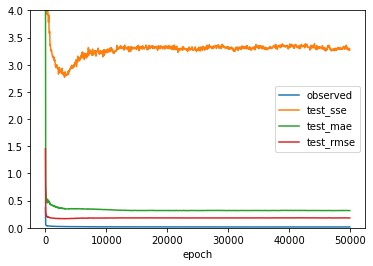

In [48]:
# losses for autoencoder
pd.DataFrame(ret_acc).T.plot(ylim=(0, 4), xlabel='epoch')

<AxesSubplot:>

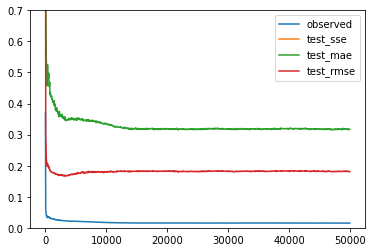

In [39]:
# losses for autoencoder
pd.DataFrame(ret_acc).T.plot(ylim=(0, .7))

In [40]:
accuracies_df = pd.DataFrame(accuracies).T.rename(columns={'sse':'Sum of Squared Errors', 'mae':'Mean Absolute Average Error', 'rmse':'Root Means Squared Error'})
accuracies_df['Sum of Error Metrics'] = accuracies_df.T.sum()
accuracies_df['Mean of Error Metrics'] = accuracies_df.T.mean()
accuracies_df.sort_values(inplace=True, by='Sum of Error Metrics')
accuracies_df = accuracies_df[['Root Means Squared Error', 'Mean Absolute Average Error', 'Mean of Error Metrics', 'Sum of Squared Errors', 'Sum of Error Metrics']]
print(accuracies_df.shape)
accuracies_df

(8, 5)


,Root Means Squared Error,Mean Absolute Average Error,Mean of Error Metrics,Sum of Squared Errors,Sum of Error Metrics
iterative,0.164622,0.309876,1.592267,2.710037,3.184534
knn_6_neighbors,0.167584,0.323840,1.649936,2.808447,3.299872
autoencoder_2000_epoch,0.169333,0.361376,1.699032,2.867356,3.398065
miss_forest,0.171047,0.309144,1.702946,2.925701,3.405891
mean_imputation,0.187568,0.374579,2.040165,3.518182,4.080329
median_imputation,0.189601,0.364730,2.074589,3.594848,4.149179
mode_imputation,0.209324,0.393763,2.492360,4.381633,4.984720
holoclean_aimnet,0.231286,0.437610,3.009099,5.349303,6.018199


In [46]:
accuracies_df.loc['holoclean_aimnet', 'Sum of Squared Errors'] - accuracies_df.loc['iterative', 'Sum of Squared Errors']

2.639266314289398

Text(0.5, 1.0, 'SSE, MAE, RMSE of Multiple Different Imputation Approaches')

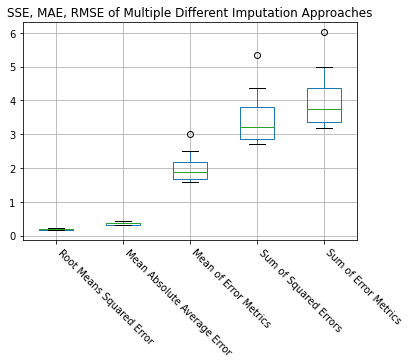

In [41]:
ax = accuracies_df.boxplot()
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha='left')
plt.title('SSE, MAE, RMSE of Multiple Different Imputation Approaches')

Text(0.5, 1.0, 'Errors for Methylation Beta-Value Imputations')

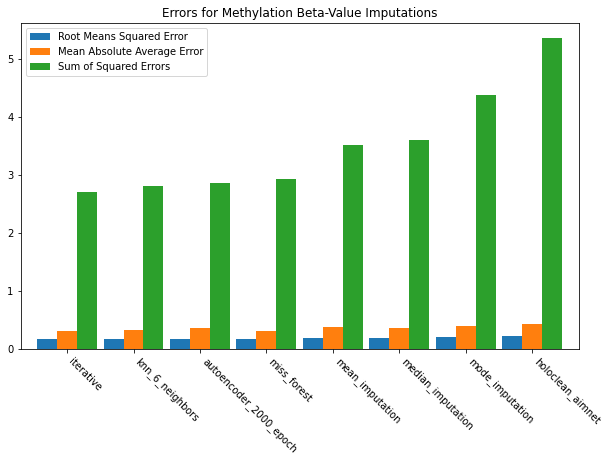

In [42]:
ax = accuracies_df.plot.bar(width=.9, figsize=(10, 6), y=['Root Means Squared Error', 'Mean Absolute Average Error', 'Sum of Squared Errors'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha='left')
plt.title('Errors for Methylation Beta-Value Imputations')

Text(0.5, 1.0, 'Errors for Methylation Beta-Value Imputations')

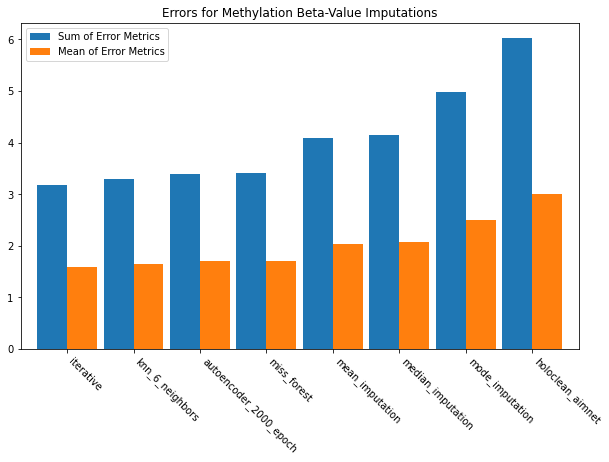

In [43]:
ax = accuracies_df.plot.bar(width=.9, figsize=(10, 6), y=['Sum of Error Metrics', 'Mean of Error Metrics'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha='left')
plt.title('Errors for Methylation Beta-Value Imputations')